# 深度學習(Deep Learning)
本章節分成三大段落  
1. 自動微分
2. 簡單線性回歸
3. 使用Tensorflow 進行數字0~9辨識

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

## 一、自動微分

### 1. 利用tenosrflow 
[資料來源](https://ithelp.ithome.com.tw/articles/10233555)  
方程式: $y = X^2$   
使用套件: tensorflow   
資料為numpy，但須轉為tensorflow資料型態

In [2]:
import numpy as np 
import tensorflow as tf 

# x 宣告為 tf.constant，就要加 g.watch(x)
x = tf.Variable(3.0)

# 自動微分: 使用tensorflow進行一皆導數
with tf.GradientTape() as g:
    #g.watch(x)
    y = x * x
    
# g.gradient(y, x) 取得梯度，Y對x作微分
dy_dx = g.gradient(y, x) # Will compute to 6.0

# 轉換為 NumPy array 格式，方便顯示
print(dy_dx.numpy())

6.0


### 2. 利用Pytoch 進行自動微分與梯度下降
需先安裝Pytoch，[參考網址](https://pytorch.org/get-started/locally/) 

In [3]:
import torch

x = torch.tensor(3.0, requires_grad=True)
y=x*x

# 反向傳導
y.backward()

print(x.grad)

tensor(6.)


## 二.利用tensorflow進行簡單迴歸
屬於神經網路中的神經層程式碼  
若要改變神經層可以套用此公式  

### 1.利用線性隨機取分別X與y 0~50之100個數據，進行簡單回歸

Epoch 0: Loss: 856.772216796875
Epoch 1: Loss: 609.6236572265625
Epoch 2: Loss: 440.2449951171875
Epoch 3: Loss: 324.1646423339844
Epoch 4: Loss: 244.61111450195312
Epoch 5: Loss: 190.0906219482422
Epoch 6: Loss: 152.72608947753906
Epoch 7: Loss: 127.11898803710938
Epoch 8: Loss: 109.56964874267578
Epoch 9: Loss: 97.54254150390625
Epoch 10: Loss: 89.29994201660156
Epoch 11: Loss: 83.65104675292969
Epoch 12: Loss: 79.7796630859375
Epoch 13: Loss: 77.12647247314453
Epoch 14: Loss: 75.30815124511719
Epoch 15: Loss: 74.06197357177734
Epoch 16: Loss: 73.20791625976562
Epoch 17: Loss: 72.62260437011719
Epoch 18: Loss: 72.22144317626953
Epoch 19: Loss: 71.94652557373047
Epoch 20: Loss: 71.7580795288086
Epoch 21: Loss: 71.62893676757812
Epoch 22: Loss: 71.5404052734375
Epoch 23: Loss: 71.47972106933594
Epoch 24: Loss: 71.43812561035156
Epoch 25: Loss: 71.40960693359375
Epoch 26: Loss: 71.39004516601562
Epoch 27: Loss: 71.37663269042969
Epoch 28: Loss: 71.36741638183594
Epoch 29: Loss: 71.36109

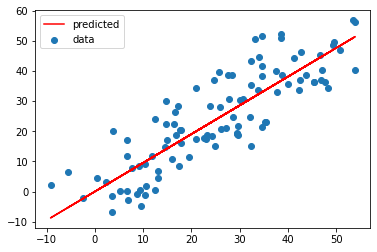

In [4]:
import numpy as np 
import tensorflow as tf 

# y_pred = W*X + b，W與b可以隨意設定
W = tf.Variable(0.0)
b = tf.Variable(0.0)

# 定義損失函數
def loss(y, y_pred):
    return tf.reduce_mean(tf.square(y - y_pred))  #MSE公式

# 定義預測值
def predict(X):
    return W * X + b
    
# 定義訓練函數
def train(X, y, epochs=40, lr=0.0001):
    current_loss=0
    # 執行訓練
    for epoch in range(epochs):
        with tf.GradientTape() as t:   # 梯度下降
            t.watch(tf.constant(X))    # X變數設定為常數constant需加入watch
            current_loss = loss(y, predict(X))

        # 取得 W, b 個別的梯度
        dW, db = t.gradient(current_loss, [W, b])
        
        # 更新權重
        # 新權重 = 原權重 — 學習率(learning_rate) * 梯度(gradient)
        W.assign_sub(lr * dW) # W -= lr * dW
        b.assign_sub(lr * db)

        # 顯示每一訓練週期的損失函數
        print(f'Epoch {epoch}: Loss: {current_loss.numpy()}') 


# 產生隨機資料
# random linear data: 100 between 0-50
n = 100
X = np.linspace(0, 50, n) 
y = np.linspace(0, 50, n) 
  
# Adding noise to the random linear data 
X += np.random.uniform(-10, 10, n) 
y += np.random.uniform(-10, 10, n) 

# reset W,b
W = tf.Variable(0.0)
b = tf.Variable(0.0)

# 執行訓練
train(X, y)

# W、b 的最佳解
print(W.numpy(), b.numpy())

import matplotlib.pyplot as plt 

plt.scatter(X, y, label='data')
plt.plot(X, predict(X), 'r-', label='predicted')
plt.legend()

## 三、TF sample 辨識0~9的數字
由Tensorflow官網提供程式碼  
從參考網站複製程式碼，[參考網站](https://www.tensorflow.org/overview/?hl=zh_tw) 
![](https://github.com/Yi-Huei/bin/blob/master/images/tl_sample2.png?raw=true)

In [5]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

#載入資料集mnist，並執行切割
(x_train, y_train),(x_test, y_test) = mnist.load_data()

#特徵工程: (X-min)/(255-0)常態化
x_train, x_test = x_train / 255.0, x_test / 255.0
 
#套入模型: Deep Learning，註解1
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),  #圖片28*28pix，input為這784
  tf.keras.layers.Dense(128, activation='relu'),  #Dense為連結層，128個神經元
  tf.keras.layers.Dropout(0.2),                   #訓練過程中隨機丟棄20%神經元
  tf.keras.layers.Dense(10, activation='softmax') #結果0~9，10個結果
])

'''參數可以改動
    optimizer 優化器，本程式指定adam
    loss 損失率
    metrics 準確率
    (註解2)
'''
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1) #隨機梯度下降，註解3
model.compile(optimizer=optimizer, #'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5


   1/1875 [..............................] - ETA: 0s - loss: 2.6212 - accuracy: 0.0000e+00

  87/1875 [>.............................] - ETA: 1s - loss: 1.0550 - accuracy: 0.6889    

 177/1875 [=>............................] - ETA: 0s - loss: 0.7926 - accuracy: 0.7661

 267/1875 [===>..........................] - ETA: 0s - loss: 0.6690 - accuracy: 0.8043

 358/1875 [====>.........................] - ETA: 0s - loss: 0.6023 - accuracy: 0.8239

 449/1875 [======>.......................] - ETA: 0s - loss: 0.5582 - accuracy: 0.8370



 541/1875 [=======>......................] - ETA: 0s - loss: 0.5207 - accuracy: 0.8472

 630/1875 [=========>....................] - ETA: 0s - loss: 0.4931 - accuracy: 0.8556

 721/1875 [==========>...................] - ETA: 0s - loss: 0.4679 - accuracy: 0.8636

 812/1875 [===========>..................] - ETA: 0s - loss: 0.4524 - accuracy: 0.8682



 903/1875 [=============>................] - ETA: 0s - loss: 0.4353 - accuracy: 0.8732

 993/1875 [==============>...............] - ETA: 0s - loss: 0.4202 - accuracy: 0.8776

1084/1875 [================>.............] - ETA: 0s - loss: 0.4041 - accuracy: 0.8819

1175/1875 [=================>............] - ETA: 0s - loss: 0.3920 - accuracy: 0.8858



1266/1875 [===================>..........] - ETA: 0s - loss: 0.3809 - accuracy: 0.8892

1356/1875 [====================>.........] - ETA: 0s - loss: 0.3737 - accuracy: 0.8915

1447/1875 [======================>.......] - ETA: 0s - loss: 0.3639 - accuracy: 0.8944

1539/1875 [=======================>......] - ETA: 0s - loss: 0.3565 - accuracy: 0.8967



1630/1875 [=========================>....] - ETA: 0s - loss: 0.3488 - accuracy: 0.8988

1721/1875 [==========================>...] - ETA: 0s - loss: 0.3418 - accuracy: 0.9008

1812/1875 [===========================>..] - ETA: 0s - loss: 0.3345 - accuracy: 0.9031



1875/1875 [==============================] - 1s 561us/step - loss: 0.3306 - accuracy: 0.9041


Epoch 2/5
   1/1875 [..............................] - ETA: 0s - loss: 0.5456 - accuracy: 0.8438



  93/1875 [>.............................] - ETA: 0s - loss: 0.1874 - accuracy: 0.9493



 183/1875 [=>............................] - ETA: 0s - loss: 0.1916 - accuracy: 0.9469



 274/1875 [===>..........................] - ETA: 0s - loss: 0.1929 - accuracy: 0.9437

 365/1875 [====>.........................] - ETA: 0s - loss: 0.1841 - accuracy: 0.9462

 456/1875 [======>.......................] - ETA: 0s - loss: 0.1840 - accuracy: 0.9454

 546/1875 [=======>......................] - ETA: 0s - loss: 0.1826 - accuracy: 0.9453

 637/1875 [=========>....................] - ETA: 0s - loss: 0.1834 - accuracy: 0.9455



 728/1875 [==========>...................] - ETA: 0s - loss: 0.1813 - accuracy: 0.9463

 814/1875 [============>.................] - ETA: 0s - loss: 0.1823 - accuracy: 0.9457

 905/1875 [=============>................] - ETA: 0s - loss: 0.1791 - accuracy: 0.9466

 995/1875 [==============>...............] - ETA: 0s - loss: 0.1785 - accuracy: 0.9470



1086/1875 [================>.............] - ETA: 0s - loss: 0.1782 - accuracy: 0.9471

1175/1875 [=================>............] - ETA: 0s - loss: 0.1788 - accuracy: 0.9469

1267/1875 [===================>..........] - ETA: 0s - loss: 0.1777 - accuracy: 0.9472

1358/1875 [====================>.........] - ETA: 0s - loss: 0.1754 - accuracy: 0.9480

1449/1875 [======================>.......] - ETA: 0s - loss: 0.1753 - accuracy: 0.9482

1539/1875 [=======================>......] - ETA: 0s - loss: 0.1746 - accuracy: 0.9485

1630/1875 [=========================>....] - ETA: 0s - loss: 0.1733 - accuracy: 0.9490

1719/1875 [==========================>...] - ETA: 0s - loss: 0.1722 - accuracy: 0.9492

1810/1875 [===========================>..] - ETA: 0s - loss: 0.1711 - accuracy: 0.9495



1875/1875 [==============================] - 1s 563us/step - loss: 0.1703 - accuracy: 0.9498


Epoch 3/5
   1/1875 [..............................] - ETA: 0s - loss: 0.2633 - accuracy: 0.9062



  89/1875 [>.............................] - ETA: 1s - loss: 0.1277 - accuracy: 0.9575

 178/1875 [=>............................] - ETA: 0s - loss: 0.1259 - accuracy: 0.9607



 270/1875 [===>..........................] - ETA: 0s - loss: 0.1366 - accuracy: 0.9583

 361/1875 [====>.........................] - ETA: 0s - loss: 0.1351 - accuracy: 0.9591



 452/1875 [======>.......................] - ETA: 0s - loss: 0.1364 - accuracy: 0.9584

 542/1875 [=======>......................] - ETA: 0s - loss: 0.1340 - accuracy: 0.9588

 632/1875 [=========>....................] - ETA: 0s - loss: 0.1343 - accuracy: 0.9589

 721/1875 [==========>...................] - ETA: 0s - loss: 0.1350 - accuracy: 0.9593



 810/1875 [===========>..................] - ETA: 0s - loss: 0.1350 - accuracy: 0.9593

 899/1875 [=============>................] - ETA: 0s - loss: 0.1369 - accuracy: 0.9589

 987/1875 [==============>...............] - ETA: 0s - loss: 0.1357 - accuracy: 0.9594

1075/1875 [================>.............] - ETA: 0s - loss: 0.1361 - accuracy: 0.9594



1163/1875 [=================>............] - ETA: 0s - loss: 0.1357 - accuracy: 0.9595

1251/1875 [===================>..........] - ETA: 0s - loss: 0.1349 - accuracy: 0.9594

1339/1875 [====================>.........] - ETA: 0s - loss: 0.1350 - accuracy: 0.9596

1427/1875 [=====================>........] - ETA: 0s - loss: 0.1349 - accuracy: 0.9597



1516/1875 [=======================>......] - ETA: 0s - loss: 0.1342 - accuracy: 0.9599

1604/1875 [========================>.....] - ETA: 0s - loss: 0.1328 - accuracy: 0.9603

1692/1875 [==========================>...] - ETA: 0s - loss: 0.1317 - accuracy: 0.9607

1781/1875 [===========================>..] - ETA: 0s - loss: 0.1317 - accuracy: 0.9607



1869/1875 [============================>.] - ETA: 0s - loss: 0.1317 - accuracy: 0.9609

1875/1875 [==============================] - 1s 572us/step - loss: 0.1316 - accuracy: 0.9609


Epoch 4/5
   1/1875 [..............................] - ETA: 0s - loss: 0.1004 - accuracy: 0.9688

  91/1875 [>.............................] - ETA: 0s - loss: 0.1162 - accuracy: 0.9691

 180/1875 [=>............................] - ETA: 0s - loss: 0.1116 - accuracy: 0.9681

 269/1875 [===>..........................] - ETA: 0s - loss: 0.1089 - accuracy: 0.9691

 355/1875 [====>.........................] - ETA: 0s - loss: 0.1091 - accuracy: 0.9685

 442/1875 [======>.......................] - ETA: 0s - loss: 0.1090 - accuracy: 0.9680



 530/1875 [=======>......................] - ETA: 0s - loss: 0.1121 - accuracy: 0.9670

 620/1875 [========>.....................] - ETA: 0s - loss: 0.1105 - accuracy: 0.9674

 707/1875 [==========>...................] - ETA: 0s - loss: 0.1127 - accuracy: 0.9668

 798/1875 [===========>..................] - ETA: 0s - loss: 0.1120 - accuracy: 0.9669



 888/1875 [=============>................] - ETA: 0s - loss: 0.1123 - accuracy: 0.9672

 978/1875 [==============>...............] - ETA: 0s - loss: 0.1120 - accuracy: 0.9670

1069/1875 [================>.............] - ETA: 0s - loss: 0.1117 - accuracy: 0.9670

1157/1875 [=================>............] - ETA: 0s - loss: 0.1105 - accuracy: 0.9673



1245/1875 [==================>...........] - ETA: 0s - loss: 0.1094 - accuracy: 0.9676

1335/1875 [====================>.........] - ETA: 0s - loss: 0.1097 - accuracy: 0.9675

1426/1875 [=====================>........] - ETA: 0s - loss: 0.1097 - accuracy: 0.9673

1480/1875 [======================>.......] - ETA: 0s - loss: 0.1096 - accuracy: 0.9674



1542/1875 [=======================>......] - ETA: 0s - loss: 0.1105 - accuracy: 0.9672

1619/1875 [========================>.....] - ETA: 0s - loss: 0.1105 - accuracy: 0.9673

1697/1875 [==========================>...] - ETA: 0s - loss: 0.1106 - accuracy: 0.9670

1774/1875 [===========================>..] - ETA: 0s - loss: 0.1108 - accuracy: 0.9670

1856/1875 [============================>.] - ETA: 0s - loss: 0.1108 - accuracy: 0.9671

1875/1875 [==============================] - 1s 603us/step - loss: 0.1111 - accuracy: 0.9671


Epoch 5/5
   1/1875 [..............................] - ETA: 0s - loss: 0.0993 - accuracy: 0.9688

  91/1875 [>.............................] - ETA: 0s - loss: 0.1120 - accuracy: 0.9633

 179/1875 [=>............................] - ETA: 0s - loss: 0.1026 - accuracy: 0.9670

 268/1875 [===>..........................] - ETA: 0s - loss: 0.0980 - accuracy: 0.9692

 356/1875 [====>.........................] - ETA: 0s - loss: 0.0979 - accuracy: 0.9699

 445/1875 [======>.......................] - ETA: 0s - loss: 0.0984 - accuracy: 0.9699

 532/1875 [=======>......................] - ETA: 0s - loss: 0.0986 - accuracy: 0.9700

 621/1875 [========>.....................] - ETA: 0s - loss: 0.0998 - accuracy: 0.9701



 705/1875 [==========>...................] - ETA: 0s - loss: 0.0987 - accuracy: 0.9707

 789/1875 [===========>..................] - ETA: 0s - loss: 0.0989 - accuracy: 0.9704

 876/1875 [=============>................] - ETA: 0s - loss: 0.0993 - accuracy: 0.9704

 962/1875 [==============>...............] - ETA: 0s - loss: 0.0984 - accuracy: 0.9707



1046/1875 [===============>..............] - ETA: 0s - loss: 0.0982 - accuracy: 0.9708

1130/1875 [=================>............] - ETA: 0s - loss: 0.0981 - accuracy: 0.9709

1215/1875 [==================>...........] - ETA: 0s - loss: 0.0968 - accuracy: 0.9715

1299/1875 [===================>..........] - ETA: 0s - loss: 0.0966 - accuracy: 0.9715



1383/1875 [=====================>........] - ETA: 0s - loss: 0.0972 - accuracy: 0.9713

1468/1875 [======================>.......] - ETA: 0s - loss: 0.0979 - accuracy: 0.9710

1554/1875 [=======================>......] - ETA: 0s - loss: 0.0975 - accuracy: 0.9711

1632/1875 [=========================>....] - ETA: 0s - loss: 0.0976 - accuracy: 0.9711

1714/1875 [==========================>...] - ETA: 0s - loss: 0.0979 - accuracy: 0.9710

1801/1875 [===========================>..] - ETA: 0s - loss: 0.0975 - accuracy: 0.9712

1875/1875 [==============================] - ETA: 0s - loss: 0.0978 - accuracy: 0.9710

1875/1875 [==============================] - 1s 597us/step - loss: 0.0978 - accuracy: 0.9710


  1/313 [..............................] - ETA: 0s - loss: 0.0600 - accuracy: 0.9688

106/313 [=========>....................] - ETA: 0s - loss: 0.1077 - accuracy: 0.9664

221/313 [====================>.........] - ETA: 0s - loss: 0.0937 - accuracy: 0.9712

313/313 [==============================] - 0s 459us/step - loss: 0.0805 - accuracy: 0.9757


[0.0804988220334053, 0.9757000207901001]

**準確度: 97.73%**

註解1 : Deep learning模型說明:  
![Alt text](https://github.com/Yi-Huei/bin/blob/master/images/tl_sample.png?raw=true)

註解2: 梯度下降法求最佳解
在設定input、output、隱藏層後，進行優化器、損失函數與準確度設定，如下圖  
![](https://github.com/Yi-Huei/bin/blob/master/images/tl_sample3.png?raw=true)


Tensorflow優化器  
[參考網站址](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD)
![](https://github.com/Yi-Huei/bin/blob/master/images/tl_sample4.png?raw=true)

tensorflow損失率  
[參考網站]( https://www.tensorflow.org/api_docs/python/tf/keras/losses)

### 程式說明
神經網路演算法依舊採用機器學習8大步驟
1. 收集資料(Dataset)
2. 清理資料(Data cleaning)  
3. 特徵工程(Feature Engineerin)
4. 資料分割為訓練組與測試組(Split)  
5. 選擇演算法(Learning Algorithm)  
6. 訓練模型(Train Model)  
7. 打分數(Score Model)  
8. 評估模型(Evalute Model)

In [6]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

In [7]:
# 匯入 MNIST 手寫阿拉伯數字 ，併分割資料
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [8]:
# 訓練/測試資料的 X/y 維度
x_train.shape, y_train.shape,x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [9]:
# 訓練資料前10筆圖片的數字
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

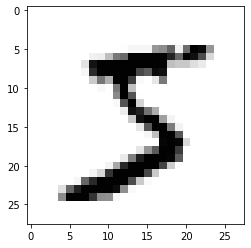

In [10]:
# 查看原始影像
import matplotlib.pyplot as plt 
img = x_train[0].reshape(28, 28)
plt.imshow(img, cmap='Greys')

In [11]:
# 顯示第1張圖片內含值
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [12]:
# 將非0的數字轉為1，顯示第1張圖片
data = x_train[1].copy()
data[data>0]=1

# 將轉換後二維內容顯示出來
text_image=[]
for i in range(data.shape[0]):
    text_image.append(''.join(str(data[i])))
text_image

['[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0]',
 '[0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0]',
 '[0 0 0

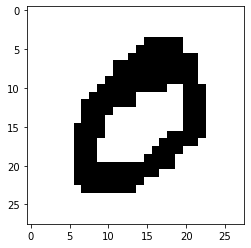

In [13]:
# 使用matplotlib.pyplot將陣列轉成圖片
img = data.reshape(28, 28)
plt.imshow(img, cmap='Greys')

In [14]:
# 特徵縮放，使用常態化(Normalization)，公式 = (x - min) / (max - min)
# 顏色範圍：0~255，所以，公式簡化為 x / 255
# 注意，顏色0為白色，與RGB顏色不同，(0,0,0) 為黑色。
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
x_train_norm[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
# 建立模型
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [16]:
# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# 訓練
history = model.fit(x_train_norm, y_train, epochs=5, validation_split=0.2) #訓練時，分割出驗證資料(validation_split)20%

Epoch 1/5


   1/1500 [..............................] - ETA: 0s - loss: 2.3519 - accuracy: 0.0938

  57/1500 [>.............................] - ETA: 1s - loss: 1.2345 - accuracy: 0.6365

  86/1500 [>.............................] - ETA: 1s - loss: 1.0253 - accuracy: 0.7042

 116/1500 [=>............................] - ETA: 1s - loss: 0.8989 - accuracy: 0.7408

 154/1500 [==>...........................] - ETA: 1s - loss: 0.8089 - accuracy: 0.7652

 233/1500 [===>..........................] - ETA: 1s - loss: 0.6865 - accuracy: 0.8046



 313/1500 [=====>........................] - ETA: 1s - loss: 0.6036 - accuracy: 0.8288

 393/1500 [======>.......................] - ETA: 1s - loss: 0.5541 - accuracy: 0.8414

 467/1500 [========>.....................] - ETA: 0s - loss: 0.5125 - accuracy: 0.8535

 546/1500 [=========>....................] - ETA: 0s - loss: 0.4834 - accuracy: 0.8617



 626/1500 [===========>..................] - ETA: 0s - loss: 0.4586 - accuracy: 0.8681

 705/1500 [=============>................] - ETA: 0s - loss: 0.4377 - accuracy: 0.8742

 781/1500 [==============>...............] - ETA: 0s - loss: 0.4207 - accuracy: 0.8788

 860/1500 [================>.............] - ETA: 0s - loss: 0.4054 - accuracy: 0.8829



 938/1500 [=================>............] - ETA: 0s - loss: 0.3943 - accuracy: 0.8860

1018/1500 [===================>..........] - ETA: 0s - loss: 0.3841 - accuracy: 0.8888

1097/1500 [====================>.........] - ETA: 0s - loss: 0.3739 - accuracy: 0.8918

1176/1500 [======================>.......] - ETA: 0s - loss: 0.3642 - accuracy: 0.8944

1255/1500 [========================>.....] - ETA: 0s - loss: 0.3536 - accuracy: 0.8976

1335/1500 [=========================>....] - ETA: 0s - loss: 0.3447 - accuracy: 0.9002

1411/1500 [===========================>..] - ETA: 0s - loss: 0.3382 - accuracy: 0.9022

1484/1500 [============================>.] - ETA: 0s - loss: 0.3306 - accuracy: 0.9045

1500/1500 [==============================] - 1s 966us/step - loss: 0.3287 - accuracy: 0.9051 - val_loss: 0.1638 - val_accuracy: 0.9526


Epoch 2/5
   1/1500 [..............................] - ETA: 0s - loss: 0.1654 - accuracy: 0.9375

  78/1500 [>.............................] - ETA: 0s - loss: 0.1717 - accuracy: 0.9499

 157/1500 [==>...........................] - ETA: 0s - loss: 0.1759 - accuracy: 0.9480

 236/1500 [===>..........................] - ETA: 0s - loss: 0.1773 - accuracy: 0.9493

 316/1500 [=====>........................] - ETA: 0s - loss: 0.1794 - accuracy: 0.9483

 396/1500 [======>.......................] - ETA: 0s - loss: 0.1769 - accuracy: 0.9486

 475/1500 [========>.....................] - ETA: 0s - loss: 0.1715 - accuracy: 0.9495



 554/1500 [==========>...................] - ETA: 0s - loss: 0.1671 - accuracy: 0.9510

 633/1500 [===========>..................] - ETA: 0s - loss: 0.1663 - accuracy: 0.9512

 712/1500 [=============>................] - ETA: 0s - loss: 0.1673 - accuracy: 0.9510

 788/1500 [==============>...............] - ETA: 0s - loss: 0.1652 - accuracy: 0.9516



 865/1500 [================>.............] - ETA: 0s - loss: 0.1653 - accuracy: 0.9515

 922/1500 [=================>............] - ETA: 0s - loss: 0.1653 - accuracy: 0.9515

 970/1500 [==================>...........] - ETA: 0s - loss: 0.1638 - accuracy: 0.9518

1020/1500 [===================>..........] - ETA: 0s - loss: 0.1628 - accuracy: 0.9518

1074/1500 [====================>.........] - ETA: 0s - loss: 0.1626 - accuracy: 0.9519

1129/1500 [=====================>........] - ETA: 0s - loss: 0.1617 - accuracy: 0.9518

1203/1500 [=======================>......] - ETA: 0s - loss: 0.1621 - accuracy: 0.9517

1272/1500 [========================>.....] - ETA: 0s - loss: 0.1621 - accuracy: 0.9520

1350/1500 [==========================>...] - ETA: 0s - loss: 0.1607 - accuracy: 0.9524

1429/1500 [===========================>..] - ETA: 0s - loss: 0.1604 - accuracy: 0.9526



1500/1500 [==============================] - 1s 806us/step - loss: 0.1601 - accuracy: 0.9528 - val_loss: 0.1257 - val_accuracy: 0.9619


Epoch 3/5
   1/1500 [..............................] - ETA: 1s - loss: 0.1166 - accuracy: 0.9688

  81/1500 [>.............................] - ETA: 0s - loss: 0.1137 - accuracy: 0.9676

 160/1500 [==>...........................] - ETA: 0s - loss: 0.1227 - accuracy: 0.9645

 231/1500 [===>..........................] - ETA: 0s - loss: 0.1270 - accuracy: 0.9635

 296/1500 [====>.........................] - ETA: 0s - loss: 0.1262 - accuracy: 0.9624



 362/1500 [======>.......................] - ETA: 0s - loss: 0.1289 - accuracy: 0.9616

 433/1500 [=======>......................] - ETA: 0s - loss: 0.1262 - accuracy: 0.9624

 508/1500 [=========>....................] - ETA: 0s - loss: 0.1240 - accuracy: 0.9631

 581/1500 [==========>...................] - ETA: 0s - loss: 0.1239 - accuracy: 0.9631



 659/1500 [============>.................] - ETA: 0s - loss: 0.1238 - accuracy: 0.9631

 734/1500 [=============>................] - ETA: 0s - loss: 0.1244 - accuracy: 0.9633

 813/1500 [===============>..............] - ETA: 0s - loss: 0.1231 - accuracy: 0.9636

 879/1500 [================>.............] - ETA: 0s - loss: 0.1225 - accuracy: 0.9640

 939/1500 [=================>............] - ETA: 0s - loss: 0.1225 - accuracy: 0.9636

1000/1500 [===================>..........] - ETA: 0s - loss: 0.1224 - accuracy: 0.9636

1065/1500 [====================>.........] - ETA: 0s - loss: 0.1228 - accuracy: 0.9636

1130/1500 [=====================>........] - ETA: 0s - loss: 0.1232 - accuracy: 0.9634

1200/1500 [=======================>......] - ETA: 0s - loss: 0.1225 - accuracy: 0.9638

1274/1500 [========================>.....] - ETA: 0s - loss: 0.1222 - accuracy: 0.9637

1347/1500 [=========================>....] - ETA: 0s - loss: 0.1222 - accuracy: 0.9637

1417/1500 [===========================>..] - ETA: 0s - loss: 0.1213 - accuracy: 0.9639

1487/1500 [============================>.] - ETA: 0s - loss: 0.1206 - accuracy: 0.9640



1500/1500 [==============================] - 1s 836us/step - loss: 0.1201 - accuracy: 0.9642 - val_loss: 0.0976 - val_accuracy: 0.9703


Epoch 4/5
   1/1500 [..............................] - ETA: 0s - loss: 0.1435 - accuracy: 0.9375

  69/1500 [>.............................] - ETA: 1s - loss: 0.1200 - accuracy: 0.9624

 129/1500 [=>............................] - ETA: 1s - loss: 0.1088 - accuracy: 0.9658

 194/1500 [==>...........................] - ETA: 1s - loss: 0.1040 - accuracy: 0.9665

 259/1500 [====>.........................] - ETA: 0s - loss: 0.0964 - accuracy: 0.9688

 323/1500 [=====>........................] - ETA: 0s - loss: 0.0957 - accuracy: 0.9689

 385/1500 [======>.......................] - ETA: 0s - loss: 0.0938 - accuracy: 0.9699



 450/1500 [========>.....................] - ETA: 0s - loss: 0.0932 - accuracy: 0.9704

 514/1500 [=========>....................] - ETA: 0s - loss: 0.0915 - accuracy: 0.9709

 577/1500 [==========>...................] - ETA: 0s - loss: 0.0926 - accuracy: 0.9706

 639/1500 [===========>..................] - ETA: 0s - loss: 0.0929 - accuracy: 0.9709



 701/1500 [=============>................] - ETA: 0s - loss: 0.0925 - accuracy: 0.9712

 764/1500 [==============>...............] - ETA: 0s - loss: 0.0923 - accuracy: 0.9714

 823/1500 [===============>..............] - ETA: 0s - loss: 0.0922 - accuracy: 0.9716

 884/1500 [================>.............] - ETA: 0s - loss: 0.0920 - accuracy: 0.9716



 946/1500 [=================>............] - ETA: 0s - loss: 0.0918 - accuracy: 0.9717

1009/1500 [===================>..........] - ETA: 0s - loss: 0.0917 - accuracy: 0.9716

1072/1500 [====================>.........] - ETA: 0s - loss: 0.0934 - accuracy: 0.9712

1134/1500 [=====================>........] - ETA: 0s - loss: 0.0937 - accuracy: 0.9710



1197/1500 [======================>.......] - ETA: 0s - loss: 0.0936 - accuracy: 0.9711

1259/1500 [========================>.....] - ETA: 0s - loss: 0.0930 - accuracy: 0.9713

1322/1500 [=========================>....] - ETA: 0s - loss: 0.0937 - accuracy: 0.9712

1384/1500 [==========================>...] - ETA: 0s - loss: 0.0943 - accuracy: 0.9709



1446/1500 [===========================>..] - ETA: 0s - loss: 0.0936 - accuracy: 0.9712

1500/1500 [==============================] - 1s 930us/step - loss: 0.0936 - accuracy: 0.9712 - val_loss: 0.0920 - val_accuracy: 0.9726


Epoch 5/5
   1/1500 [..............................] - ETA: 0s - loss: 0.1738 - accuracy: 0.9688

  66/1500 [>.............................] - ETA: 1s - loss: 0.0760 - accuracy: 0.9759

 130/1500 [=>............................] - ETA: 1s - loss: 0.0756 - accuracy: 0.9757

 195/1500 [==>...........................] - ETA: 1s - loss: 0.0769 - accuracy: 0.9766

 259/1500 [====>.........................] - ETA: 0s - loss: 0.0804 - accuracy: 0.9749

 324/1500 [=====>........................] - ETA: 0s - loss: 0.0805 - accuracy: 0.9752

 389/1500 [======>.......................] - ETA: 0s - loss: 0.0801 - accuracy: 0.9748

 453/1500 [========>.....................] - ETA: 0s - loss: 0.0805 - accuracy: 0.9745

 517/1500 [=========>....................] - ETA: 0s - loss: 0.0814 - accuracy: 0.9743



 583/1500 [==========>...................] - ETA: 0s - loss: 0.0825 - accuracy: 0.9742

 646/1500 [===========>..................] - ETA: 0s - loss: 0.0807 - accuracy: 0.9746

 711/1500 [=============>................] - ETA: 0s - loss: 0.0804 - accuracy: 0.9749

 776/1500 [==============>...............] - ETA: 0s - loss: 0.0797 - accuracy: 0.9751



 841/1500 [===============>..............] - ETA: 0s - loss: 0.0802 - accuracy: 0.9747

 905/1500 [=================>............] - ETA: 0s - loss: 0.0799 - accuracy: 0.9746

 969/1500 [==================>...........] - ETA: 0s - loss: 0.0797 - accuracy: 0.9748

1033/1500 [===================>..........] - ETA: 0s - loss: 0.0798 - accuracy: 0.9748



1095/1500 [====================>.........] - ETA: 0s - loss: 0.0794 - accuracy: 0.9749

1158/1500 [======================>.......] - ETA: 0s - loss: 0.0798 - accuracy: 0.9747

1220/1500 [=======================>......] - ETA: 0s - loss: 0.0803 - accuracy: 0.9747

1283/1500 [========================>.....] - ETA: 0s - loss: 0.0801 - accuracy: 0.9748



1346/1500 [=========================>....] - ETA: 0s - loss: 0.0800 - accuracy: 0.9748

1409/1500 [===========================>..] - ETA: 0s - loss: 0.0800 - accuracy: 0.9749

1472/1500 [============================>.] - ETA: 0s - loss: 0.0799 - accuracy: 0.9748

1500/1500 [==============================] - 1s 918us/step - loss: 0.0803 - accuracy: 0.9746 - val_loss: 0.0846 - val_accuracy: 0.9750


loss、accuracy :訓練資料的損失率與正確率  
val_loss、val_accuracy: 驗證資料的損失率與正確率

In [18]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

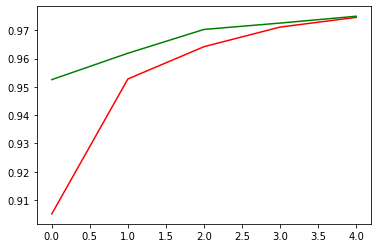

In [19]:
# 對訓練過程的準確度繪圖
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'g')

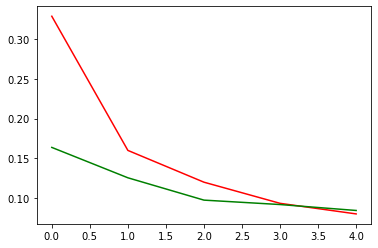

In [20]:
# 對訓練過程的損失函數繪圖
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'g')

In [21]:
# 評估，打分數
score=model.evaluate(x_test_norm, y_test, verbose=0)
score

[0.07845523953437805, 0.9749000072479248]

In [22]:
# 實際預測 20 筆
predictions = model.predict_classes(x_test_norm)
# get prediction result
print('prediction:', predictions[0:20])
print('actual    :', y_test[0:20])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


prediction: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
actual    : [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


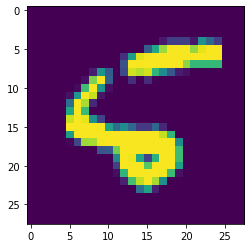

In [23]:
# 顯示錯誤的資料圖像
X2 = x_test[8,:,:]
plt.imshow(X2.reshape(28,28))
plt.show() 

In [24]:
# 顯示模型的彙總資訊
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [25]:
# 模型存檔
model.save('model.h5')

In [26]:
# 模型載入
model = tf.keras.models.load_model('model.h5')

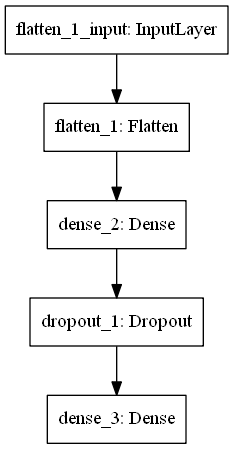

In [27]:
# 繪製模型
# 需安裝 graphviz (https://www.graphviz.org/download/)
# 將安裝路徑 C:\Program Files (x86)\Graphviz2.38\bin 新增至環境變數 path 中
# pip install graphviz
# pip install pydotplus
tf.keras.utils.plot_model(model, to_file='model.png')